# Models of Evolution

1. Mutations
2. Recombination
3. Natural Selection
4. Migration
5. Mating
6. Popluation Size

This notebook explores fundamental evolutionary models and code that shows their impact

In [1]:
import numpy as np
import pandas as pd
import math
import json
import matplotlib.pyplot as plt

In [2]:
#from IPython.core.interactiveshell import InteractiveShell
#InteractiveShell.ast_node_interactivity = "all"

# Fundamentals of Genomics

Evolution is driven through mutations accumulating in a chromosome.  A **chromosome** is a structure of nucleic acids and protein found in the nucleus of most living cells, carrying genetic information in the form of genes. For this lesson, we'll only evaluate the nucleic acids in a chromosome. In this exploration we will use *A* (adenine), *C* (cytosine), *G* (guanine), and *T* (thymine) nucleotides, also known as **bases**. Each position on a chromosome is called a **locus** and at each position the specific nucleotide is referred to as a **varient**.  A set of variants from a single chromosome ordered by locus is referred to as a **sequence**.  When multiple of the sequences are structured by order they become an **alignment** that allows you to see **alleles**, loci where more than one unique variant is present. 


## Alignment

We will start by generating 8 identical sequence of 10 varients.  We will add a skew to the generation to bias the A and T nucleotides so that we get less of a random sequence.  

In [3]:
# sets the seed so the random generation is the same each time
np.random.seed(123)
bases = ['A','C','G','T']

# weights for our bases
base_p = [0.4, 0.1, 0.1, 0.4] 

# create a single strand
strand = np.random.choice(bases,10, p=base_p)

# create alginment of 5 identical strands
alignment = np.tile(strand,(8,1))

#converting to pandas
align_df = pd.DataFrame(alignment)
align_df

,0,1,2,3,4,5,6,7,8,9
0,T,A,A,G,T,C,T,T,C,A
1,T,A,A,G,T,C,T,T,C,A
2,T,A,A,G,T,C,T,T,C,A
3,T,A,A,G,T,C,T,T,C,A
4,T,A,A,G,T,C,T,T,C,A
5,T,A,A,G,T,C,T,T,C,A
6,T,A,A,G,T,C,T,T,C,A
7,T,A,A,G,T,C,T,T,C,A


now we have an alignment where we have 8 strands (*n=8*), each strand has a length of 10 (*L=10*) and we have no sites with more than a single unique variant (*S=0*).   Let's now introduce a few **SNP** (single-nucleotide polymorphism), or a substitution of a single nucleotide at a specific position in the genome.   We'll add 5 SNPs at random

In [4]:
np.random.seed(1)
mut_df = align_df.copy()

for i in range(5):
    # creates a copy of the base list, generates a random strand and locus to mutate, 
    # removes the existing variant from the options, then picks a random choice of the bases left
    mut = bases.copy()
    strand = np.random.randint(0,8)
    loci = np.random.randint(0,10)
    existing_variant = mut_df[loci][strand]
    mut.remove(existing_variant)
    mut_df[loci][strand] = np.random.choice(mut)
mut_df

,0,1,2,3,4,5,6,7,8,9
0,T,C,A,G,T,C,T,T,C,A
1,T,A,A,G,T,C,T,T,C,A
2,T,A,A,G,G,C,T,T,C,A
3,T,A,A,G,T,A,T,T,C,A
4,T,A,A,G,T,C,T,T,C,A
5,T,A,A,G,T,C,T,T,G,A
6,T,A,A,G,T,C,T,T,C,A
7,T,A,A,G,T,C,C,T,C,A


We've now have 5 loci with multiple Alleles (1,4,5,6,8) so now *S=5*.  Another form of mutation can be inserts and deletions. **Insertions** are when a strand acquires new bases that would generate a new loci not present in any other strand.  A **Deletions** is the opposite, or when a strand's base is removed at a loci. Both of these processes exert evolutionary impact and are often lumped togenter as "InDels" as there can be at times difficutly in discerning from which a new loci occurs. In both cases, the missingness of an allele (whether on the strand or on other strands) is represented with a period ".".  We will now add in a deletion to our alignment.

In [5]:
np.random.seed(123)
strand = np.random.randint(0,8)
loci = np.random.randint(0,10)
mut_df[loci][strand] = '.'
mut_df

,0,1,2,3,4,5,6,7,8,9
0,T,C,A,G,T,C,T,T,C,A
1,T,A,A,G,T,C,T,T,C,A
2,T,A,A,G,G,C,T,T,C,A
3,T,A,A,G,T,A,T,T,C,A
4,T,A,A,G,T,C,T,T,C,A
5,T,A,A,G,T,C,T,T,G,A
6,T,A,.,G,T,C,T,T,C,A
7,T,A,A,G,T,C,C,T,C,A


At this point we now have 6 loci with multiple alleles *S=6*.  We can now calculate the allele frequency at each loci.  The allele frequency is the relative frequency of an allele (variant of a gene) at a particular locus in a population, expressed as a fraction or percentage.

The frequency ($p$) of an allele *A* is the fraction of the number of copies ($n_A$) of the A allele and the population or sample size ($N$), so
$$
p = \frac{n_A}{N}
$$



In [6]:
for i in range(10):
    #get values as dictionary
    vals = mut_df[i].value_counts().to_dict()
    
    # get N
    total_ct = sum(vals.values()) 
    
    #iterate through each value and create a frequency dictionary
    freq_dict = {j:vals[j]/total_ct for j in vals}
    mut_df.loc['allele_freq',i] = str(freq_dict)
mut_df

,0,1,2,3,4,5,6,7,8,9
0,T,C,A,G,T,C,T,T,C,A
1,T,A,A,G,T,C,T,T,C,A
2,T,A,A,G,G,C,T,T,C,A
3,T,A,A,G,T,A,T,T,C,A
4,T,A,A,G,T,C,T,T,C,A
5,T,A,A,G,T,C,T,T,G,A
6,T,A,.,G,T,C,T,T,C,A
7,T,A,A,G,T,C,C,T,C,A
allele_freq,{'T': 1.0},"{'A': 0.875, 'C': 0.125}","{'A': 0.875, '.': 0.125}",{'G': 1.0},"{'T': 0.875, 'G': 0.125}","{'C': 0.875, 'A': 0.125}","{'T': 0.875, 'C': 0.125}",{'T': 1.0},"{'C': 0.875, 'G': 0.125}",{'A': 1.0}


In the new row we can now clearly see the frequencies of each allele and the frequency of the missingness.  As we can see, even when there are multiple alleles, one tends to dominate within a popluation.  This is most common as allele variations, or mutations, are rarely advantageous and so they tend to stay in low frequencies.  We'll explore next some models of mutation to better understand why these alleles persist, even in low frequencies, and how they are introduced and spread.

## Wright-Fisher Model 
This is a common model for genetic drift.  **Genetic drift** is the stocastic change of alleles frequency in a population.  Drift differs from Natural Selection since Natural Selection is a deterministic change. Wright-fisher assumes the following
1. The population remains at a constant size across generations.  This means that offsprings replace the parent. 
2. Individuals are diploid hermaphrodites.  This means that, if we include the sex chromosomes we have:
    1. $2N$ Autosomes - non sex determining chromosomes
    2. $0.5N$ mtDNA - the mitochondria come from only the mother 
    3. $1.5N$ X or Z - the chromosome in homogametic sex meaning half the population have 2 copies and the other half have 1 copy (e.g. Females in humans)
    4. $0.5N$ Y or Q - the chromosome in heterogametic sex meaning only half the population has 1 copy (e.g. Males in humans)
3. Mating is assumed to be random.

This model is only really useful in species with non-overlapping periodic generations such as insects or plants. 

### Generational Allele Frequency
In the Wright-Fisher model, since each individual is a diploid, there is 2N chromosomes available.  Let's assume that at a loci, only 2 alleles can be present: $A_1$ and $A_2$. The count of $A_1$ can be represented as $i$ meaning we can represent the allele frequency at time $t$ as
$$
p_t = \frac{i}{2N}
$$
With this, since there are only 2 alleles present at a location in the Wright-Fisher model, we can then assume that the allele frequency for $A_2$ at time $t$ is all of the remaning chromosomes or
$$
q_t = \frac{2N-i}{2N}
$$
With this we can then derive a formula for quickly going from $p_t$ to $q_t$ using the following:

$$p_t = \frac{i}{2N}$$

$$2Np_t = i$$

$$q_t = \frac{2N-i}{2N} = \frac{2N-2Np_t}{2N} = \frac{2N(1-p_t)}{2N} = 1-p_t$$

$$q_t + p_t = 1$$

This agrees with our logical interpretation since, if the total set of alleles (1) is the sum of all the allele frequencies, in a **biallelic** loci, or a loci with two alleles, this would be $q_t + p_t$


In the Wright-Fisher model, the sampling of chromosomes for the next generation is the same as sampling from a binomial distribution leading to a mean $E$ and variance $Var$ of 
$$E(p_{t+1}) = p_t$$
$$Var(p_{t+1}) = \frac{p_t q_t}{2N}$$

With this mean and variance, in a population that meets the Wright-Fisher model prediction, the alleles will drift until one of the alleles becomes **fixed** or reaches 100% frequency within a population. Let's observe taking locus 1 from our alignment as a example and running 100 generations 5 times.

Let's start with Locus 1, and separate into 4 diploid individuals

In [7]:
# create a copy of loci 1
wf_loci_df = mut_df[[1]].copy()

#generate a list that creates 4 diploid individuals and appends the allele frequency dict
new_index = sorted([str(i+1) + '_' + str(j+1) for j in range(2) for i in range(4)] + [wf_loci_df.index[-1]])

# rename the index
wf_loci_df.index = new_index

wf_loci_df

,1
1_1,C
1_2,A
2_1,A
2_2,A
3_1,A
3_2,A
4_1,A
4_2,A
allele_freq,"{'A': 0.875, 'C': 0.125}"


conveniently we have the allele frequencies already calculated from before.  This allows us to quickly the expected mean and variance for our alleles. $p_t$ will refer to the base *A* at time *t* and $q_t$ will refer to the base *C* at time *t*

In [8]:
freq_dict = eval(wf_loci_df[1]['allele_freq'])
p_t = freq_dict['A']
q_t = freq_dict['C']
var = (p_t*q_t)/(2*4)

print(f'p_t = {p_t}')
print(f'q_t = {q_t}')
print(f'var = {var}')

p_t = 0.875
q_t = 0.125
var = 0.013671875


now that we have the baseline, we can begin to simulate K generations.  With each generation, we will use a binomial distribution predictor in numpy to simulate 8 draws from a binomial distribution using a probability $p_t$ to give us a new $i$ for the generation.  Using this, we will recalculate the $p_t, q_t, var$.  We will continue with the assumption that $N$=4. Let's simulate 10 generations.

In [9]:
def sim_wright_fisher(g, n, i, seed=123):
    '''
    runs g simulations of wright-fisher drift using a population size of n and an initial allele count of i.
    this simulation assumes diploidy.
    
    g = # of generations
    n = population size
    i = ct of the allele to track
    seed = random seed for the binomial selection
    '''
    # ensure consistent sampling
    np.random.seed(seed)
    
    # setup the dataframe
    #establish baseline 
    wfd_df = pd.DataFrame(columns = ['2N','i','p_t','q_t','var'])
    p_t = i/(2*n)
    q_t = 1-p_t
    var = (p_t*q_t)/(2*n)
    wfd_df.loc[0] = [2*n,i,p_t,q_t,var]
    wfd_df
    

    for i in range(1,g+1):

        # exptract info from previous row
        prev_p = wfd_df['p_t'][i-1]
        two_n = wfd_df['2N'][i-1]

        # using np binomial, we supply the number of changes (two_n) and probability (prev_p) and
        # get how many chromosomes in the next generation have A
        new_i = np.random.binomial(two_n,prev_p)

        # calculate new probabilities and variance off of the simulation
        new_p = new_i/two_n
        new_q = 1-new_p
        new_var = (new_p*new_q)/(two_n)

        # add a row to the drift table
        wfd_df.loc[i] = [two_n,new_i,new_p,new_q,new_var]

        # if the allele becomes fixed (i = two_n) or drops out (i = 0) we break the look
        if new_i == two_n:
            # print(f'Allele A became fixed in {i} generations.')
            return wfd_df
        if new_i == 0:
            # print(f'Allele A was lost in {i} generations.')
            return wfd_df
    return wfd_df

In [10]:
# running the simulation for 1 
ct_a = sum(wf_loci_df[1] == 'A')
ct_c = sum(wf_loci_df[1] == 'C')
n = int((ct_a + ct_c)/2)

# run the simulation for 10 generations, a N=4,
small_wf_df = sim_wright_fisher(10, n, ct_a)
small_wf_df

,2N,i,p_t,q_t,var
0,8.0,7.0,0.875,0.125,0.013672
1,8.0,7.0,0.875,0.125,0.013672
2,8.0,8.0,1.000,0.000,0.000000


we can see that when $N$ is low and $p_t$ is high, the allele can become fixed very quickly.  Let's now look at this simulation with the same $p_t$ and a $N=1000$ but still just 10 generations

In [11]:
# extract the frequency of A 
freq_dict = eval(wf_loci_df[1]['allele_freq'])
p_a = freq_dict['A']

n=1000
i_k = int(p_a*n*2)

sim_wright_fisher(10, n, i_k)

,2N,i,p_t,q_t,var
0,2000.0,1750.0,0.8750,0.1250,0.000055
1,2000.0,1769.0,0.8845,0.1155,0.000051
2,2000.0,1774.0,0.8870,0.1130,0.000050
3,2000.0,1785.0,0.8925,0.1075,0.000048
4,2000.0,1756.0,0.8780,0.1220,0.000054
5,2000.0,1746.0,0.8730,0.1270,0.000055
6,2000.0,1752.0,0.8760,0.1240,0.000054
7,2000.0,1734.0,0.8670,0.1330,0.000058
8,2000.0,1738.0,0.8690,0.1310,0.000057
9,2000.0,1735.0,0.8675,0.1325,0.000057


here we can see that the allele does not become fixed and that over time we have drifted over 0.1% in allele frequency. now let's visualize what this could look like over 1000 generations. 

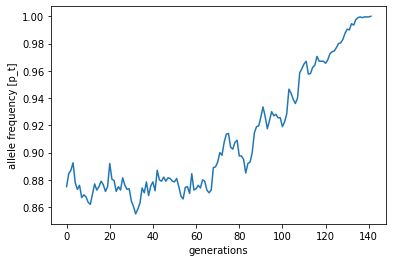

In [12]:
thou_wf_df = sim_wright_fisher(1000, n, i_k)
thou_wf_df.tail()

plt.plot(thou_wf_df.index, thou_wf_df['p_t'])
plt.xlabel('generations')  
plt.ylabel('allele frequency [p_t]')  
plt.show()

as we can see in the plot, for about 65 generations the frequency remains steady then starts to climb until it reaches fixations at 141 generations.  Sincw we have a random selection, let's generate 10 random runs and see how they differ

<AxesSubplot:xlabel='generations', ylabel='allele frequency [p_t]'>

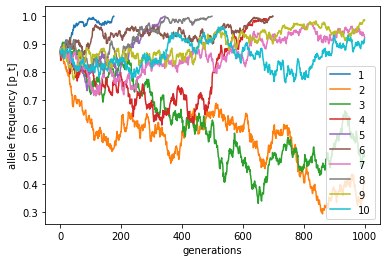

In [13]:
gen = 1000
sims = 10

#creting a blank dataframe with the columns for each simulation and a row for each generation
ten_kgen_wf_df = pd.DataFrame(columns = [i+1 for i in range(sims)])
ten_kgen_wf_df = ten_kgen_wf_df.reindex(list(range(0, gen))).reset_index(drop=True)

for seed in range(1,sims+1):
    # clears the df
    tmp_df = pd.DataFrame()
    # runs the wf simulation
    tmp_df = sim_wright_fisher(gen, n, i_k, seed)
    
    # stores the run in the column
    ten_kgen_wf_df[seed] = tmp_df['p_t']
    
ten_kgen_wf_df.plot.line(xlabel='generations', ylabel='allele frequency [p_t]')

here we can see how variable genetic drift can be when we look at the Wright-Fisher model.  Even though the probability of an allele frequency at any point in time t is the same looking from an initial time pooint, with each generation, because of the variance and binomial distribution, we can reach fixation quickly or even trend towards loss, as seen in simulations 2 and 3 above. 